<a href="https://colab.research.google.com/github/TMhdSofyan/Convergence_Analysis/blob/main/Polynomial_Chaos_Expansion_SampleTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Data/Experimental_Design2.csv')
df.tail()

,ID,Generator,Status,Result Status,Proxy Role,Keep SR3,Has SR3,Rating,CCPOR,KRG,...,PERMK_MULTI,POR_MULTI,SORW,Cum_Oil,Cum_Gas,Execution Node,Dataset Path,Optimal,MCMC Count,Comment
17072,17072,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.531235,...,1.159760,0.997680,0.100961,1643914.0,317224130.0,77-1134-41,SA.cmsd\SA_17072.dat,False,0,NaN
17073,17073,User,Complete,NormalTermination,Training,Auto,False,0,0.000004,0.499895,...,0.870061,1.156218,0.108906,1661441.1,330066270.0,77-1134-41,SA.cmsd\SA_17073.dat,False,0,NaN
17074,17074,User,Complete,NormalTermination,Training,Auto,False,0,0.000004,0.509262,...,0.960209,0.982429,0.100172,1584137.9,315742180.0,77-1134-41,SA.cmsd\SA_17074.dat,False,0,NaN
17075,17075,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.504134,...,1.041308,1.062378,0.090308,1632599.6,327702820.0,77-1134-41,SA.cmsd\SA_17075.dat,False,0,NaN
17076,17076,User,Complete,NormalTermination,Training,Auto,False,0,0.000005,0.431177,...,1.219194,1.158148,0.097388,1668201.6,328796160.0,77-1134-41,SA.cmsd\SA_17076.dat,False,0,NaN


In [5]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [6]:
!pip3 install UQpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 kB 7.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=f6cdfa6930f41044b8b2b4cca6b6655a55f616f6fbf0286ba71f45b0d617d84b
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [21]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [22]:
df2 = df.drop(columns = ['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating','KRG', 'KRO', 'KRW', 'NG', 'NW','PERMK_MULTI', 'SORW', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'])
df2.tail()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil
17072,0.000005,1.002530,0.997680,1643914.0
17073,0.000004,1.020072,1.156218,1661441.1
17074,0.000004,0.787814,0.982429,1584137.9
17075,0.000005,0.881290,1.062378,1632599.6
17076,0.000005,1.074085,1.158148,1668201.6


_________

#**Degree 3**

In [23]:
first_1000 = df2.head(500)
X = first_1000.drop(columns="Cum_Oil").to_numpy()
y = first_1000.Cum_Oil.to_numpy()

In [24]:
X.shape

(500, 3)

In [25]:
y

array([1641502. , 1658139.5, 1638181.8, 1637746.9, 1642039. , 1643717.4,
       1655225.8, 1648534.3, 1580876.5, 1612149.5, 1651127.6, 1657736.9,
       1648434.1, 1620649.8, 1597741.3, 1637607.4, 1633578.8, 1671130. ,
       1633316.1, 1628004.9, 1648828.8, 1647589.3, 1623170.6, 1622766.6,
       1591752.8, 1595351.6, 1632457.8, 1630450. , 1635968.9, 1665459.8,
       1627404.9, 1661058. , 1588380. , 1638499.8, 1637566. , 1662652.4,
       1652195.1, 1637508.1, 1626611. , 1629242.3, 1651163. , 1641375. ,
       1633874.4, 1635672.9, 1619991.9, 1654373.4, 1655188.1, 1630664.9,
       1651584.4, 1662198.1, 1632719.9, 1618907.3, 1632368.3, 1598667.4,
       1645383.4, 1607628.8, 1598181.3, 1619018.5, 1643182.9, 1636174.5,
       1664451.6, 1584142.9, 1603530.9, 1663903.8, 1649015.8, 1647225.3,
       1610777.3, 1600663.8, 1631384.8, 1571254.6, 1647346. , 1638869.4,
       1673400. , 1623496.9, 1659005.6, 1610355.5, 1614475.3, 1672096.3,
       1595829.5, 1624273.6, 1646633.8, 1653613.4, 

In [26]:
from UQpy.distributions import Uniform, Normal, JointIndependent
from UQpy.surrogates import *

In [27]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [28]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [29]:
moments=pce.get_moments()
moments

(1760544.5526961142, 6728018168148006.0)

In [30]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.76054455e+06]
 [-9.65815333e+05]
 [-7.24966224e+05]
 [-6.10558859e+05]
 [-2.33426739e+05]
 [-9.51770318e+05]
 [ 1.98341752e+06]
 [ 4.62999948e+05]
 [ 7.88823749e+05]
 [-7.34359297e+05]
 [-3.71224793e+06]
 [ 3.14494039e+06]
 [-3.89540431e+05]
 [-6.87351041e+06]
 [ 5.15943946e+05]
 [ 3.04640165e+06]
 [ 3.55567782e+06]
 [ 2.96943915e+06]
 [ 1.92746359e+06]
 [-7.01998998e+06]
 [-2.11774871e+06]
 [-2.18927301e+06]
 [ 1.81585033e+06]
 [-1.44283714e+06]
 [ 3.91650075e+06]
 [ 1.55739039e+06]
 [-4.79786392e+05]
 [ 4.41970149e+06]
 [ 3.08203166e+06]
 [ 1.47275683e+06]
 [-1.94493192e+05]
 [ 2.05577124e+06]
 [-1.21596538e+06]
 [-1.19437008e+06]
 [-3.46024874e+06]
 [-5.88473428e+06]
 [-5.00978234e+06]
 [-4.17732894e+06]
 [ 1.46355404e+07]
 [-1.57689515e+06]
 [-2.01007321e+07]
 [ 3.37604896e+06]
 [-3.28748018e+05]
 [-5.02060079e+06]
 [ 1.50096963e+07]
 [ 1.19801562e+07]
 [-1.11657543e+06]
 [ 5.91678127e+06]
 [ 8.51940253e+06]
 [ 6.13589869e+06]
 [ 3.28263916e+05]
 [-3.25849008

In [31]:
Test_Data = df2.copy()
X_test = Test_Data.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [32]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data['Cum_Oil_PCE'] = y_test

Test_Data.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641790e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657821e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637511e+06
3,0.000003,1.085006,0.985052,1637746.9,1.637744e+06
4,0.000005,0.893916,1.116380,1642039.0,1.642011e+06


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data)

# Predict on training and test sets
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.09145112276816479


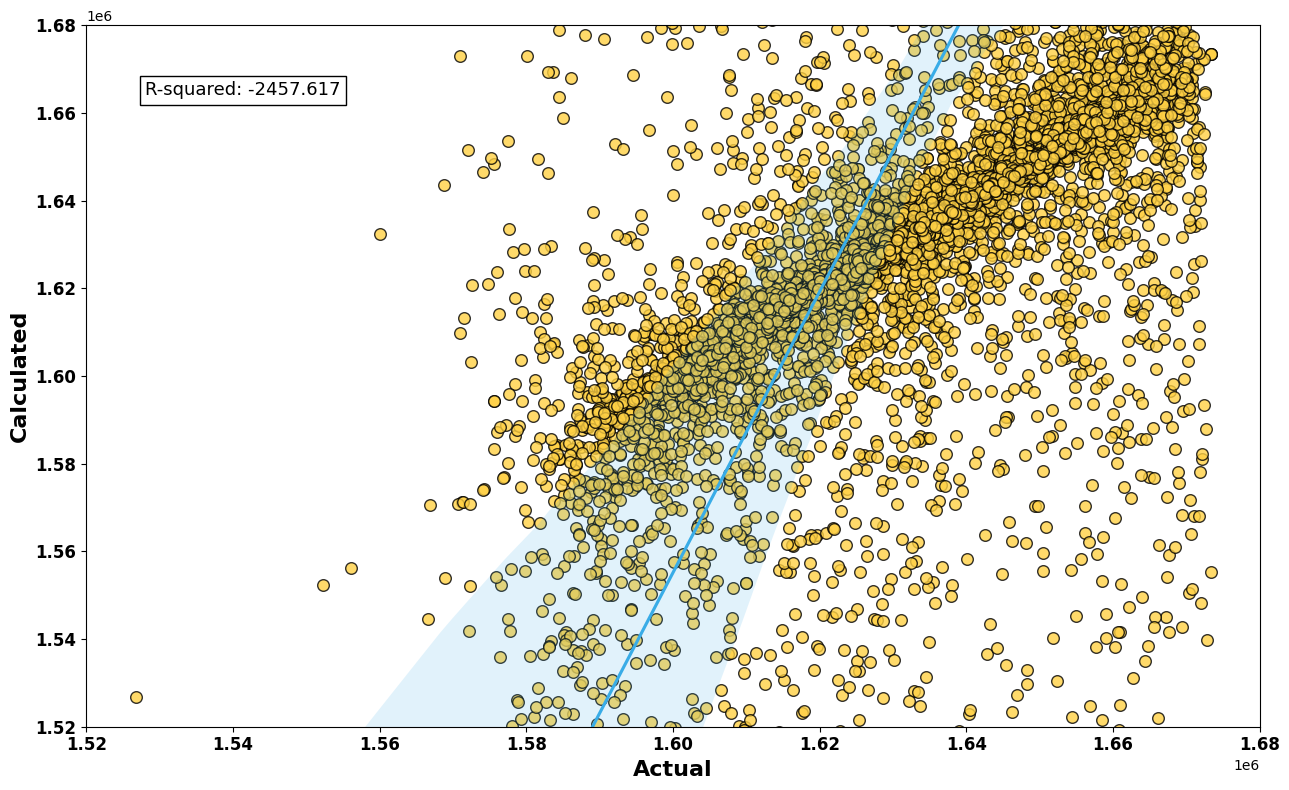

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample500.png', dpi=600)
plt.show()

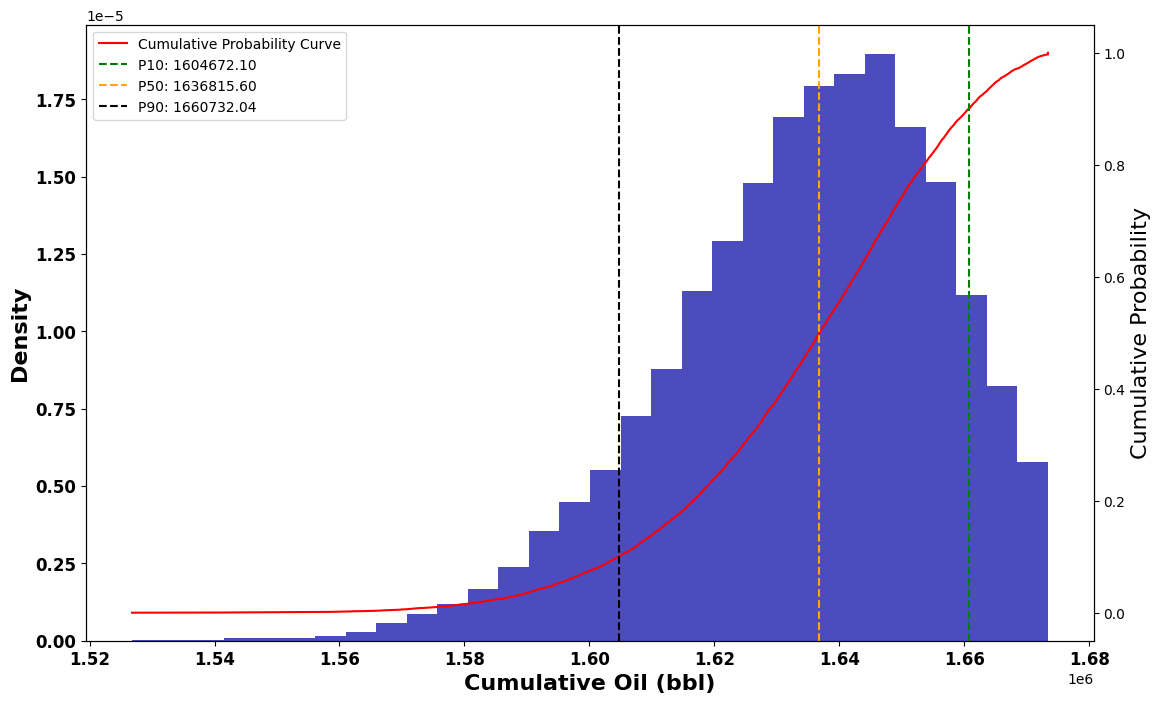

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.7, color='#0000a5', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Cumulative probability curve
sorted_cum_oil = np.sort(df['Cum_Oil'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(df['Cum_Oil'], 10)
p50 = np.percentile(df['Cum_Oil'], 50)
p10 = np.percentile(df['Cum_Oil'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Cumulative.png', dpi=600)
plt.show()

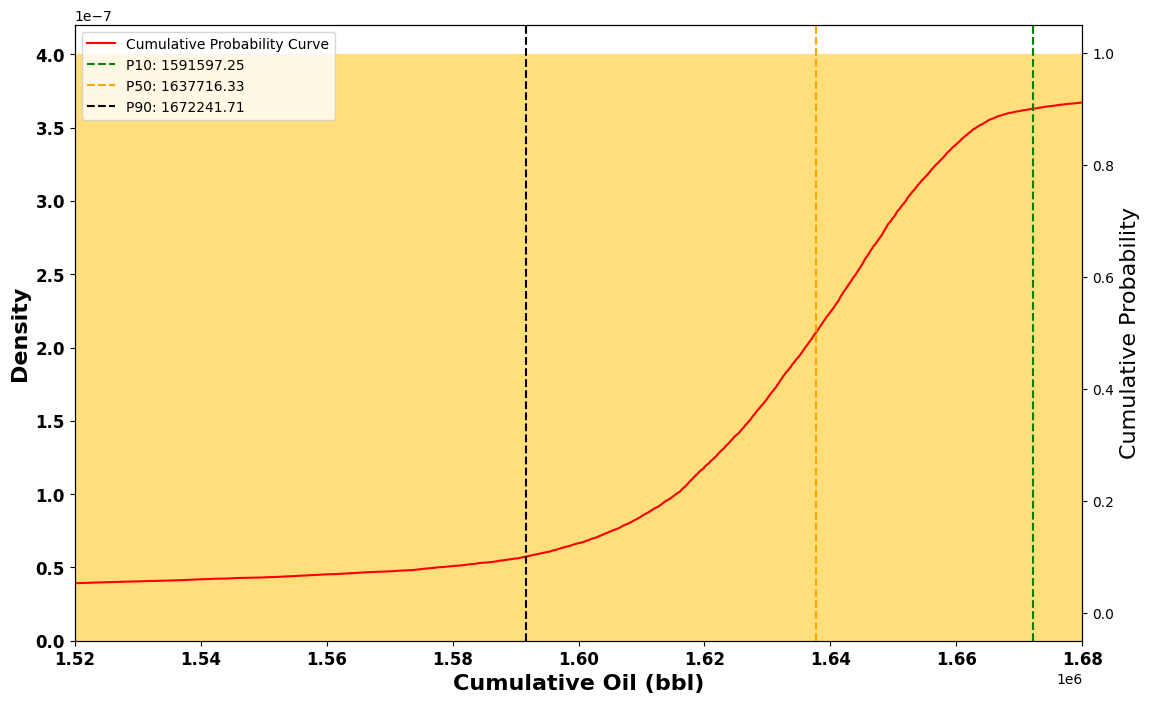

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Sample500.png', dpi=600)
plt.show()

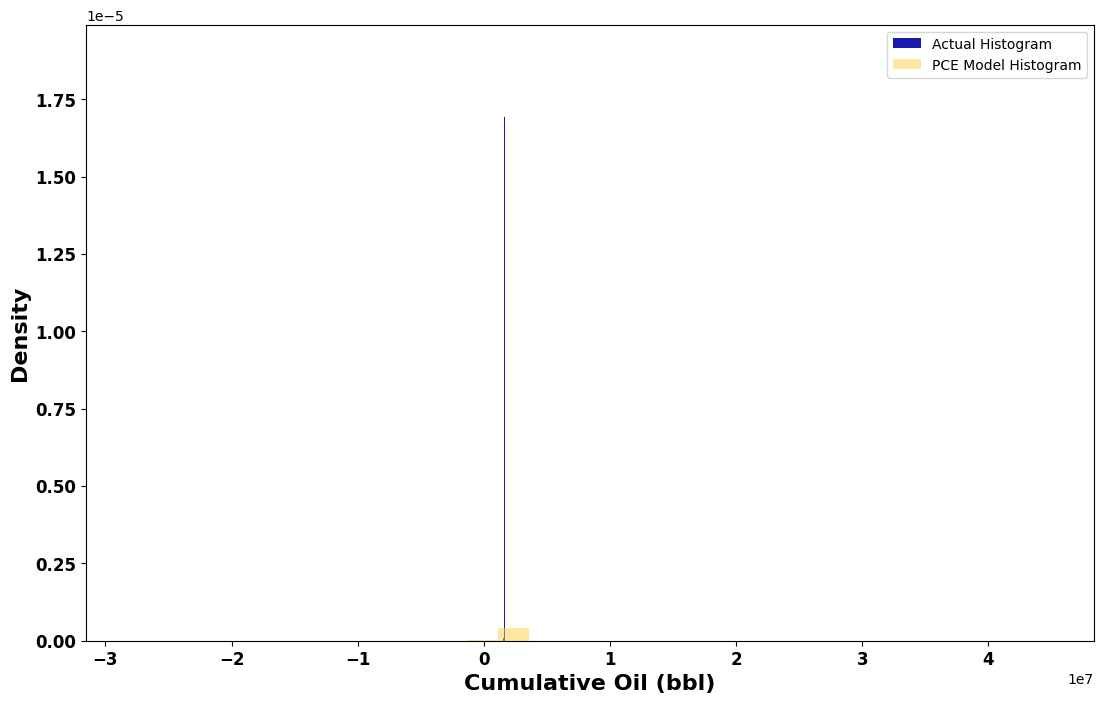

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Sample500.png', dpi=600)
plt.show()

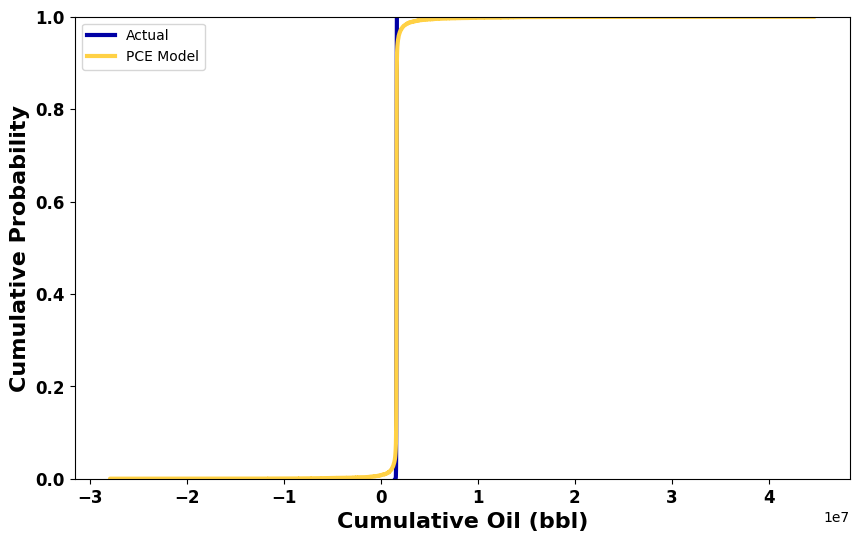

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Create the cumulative distribution plot
plt.figure(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Sample500.png', dpi=600)
plt.show()

___________

#**DEGREE 5**

In [38]:
first_1000_2 = df2.head(1000)
X = first_1000_2.drop(columns="Cum_Oil").to_numpy()
y = first_1000_2.Cum_Oil.to_numpy()

In [39]:
X.shape

(1000, 3)

In [40]:
y

array([1641502. , 1658139.5, 1638181.8, 1637746.9, 1642039. , 1643717.4,
       1655225.8, 1648534.3, 1580876.5, 1612149.5, 1651127.6, 1657736.9,
       1648434.1, 1620649.8, 1597741.3, 1637607.4, 1633578.8, 1671130. ,
       1633316.1, 1628004.9, 1648828.8, 1647589.3, 1623170.6, 1622766.6,
       1591752.8, 1595351.6, 1632457.8, 1630450. , 1635968.9, 1665459.8,
       1627404.9, 1661058. , 1588380. , 1638499.8, 1637566. , 1662652.4,
       1652195.1, 1637508.1, 1626611. , 1629242.3, 1651163. , 1641375. ,
       1633874.4, 1635672.9, 1619991.9, 1654373.4, 1655188.1, 1630664.9,
       1651584.4, 1662198.1, 1632719.9, 1618907.3, 1632368.3, 1598667.4,
       1645383.4, 1607628.8, 1598181.3, 1619018.5, 1643182.9, 1636174.5,
       1664451.6, 1584142.9, 1603530.9, 1663903.8, 1649015.8, 1647225.3,
       1610777.3, 1600663.8, 1631384.8, 1571254.6, 1647346. , 1638869.4,
       1673400. , 1623496.9, 1659005.6, 1610355.5, 1614475.3, 1672096.3,
       1595829.5, 1624273.6, 1646633.8, 1653613.4, 

In [41]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [42]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [43]:
moments=pce.get_moments()
moments

(1601728.1901737251, 8458851360223.883)

In [44]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.60172819e+06]
 [-4.96439186e+03]
 [-1.16381084e+04]
 [-5.85393393e+04]
 [-1.28160176e+05]
 [-1.07414426e+05]
 [-1.08232933e+05]
 [ 1.35291901e+04]
 [-2.31079466e+04]
 [-5.97497785e+04]
 [-7.84908473e+04]
 [-1.60027106e+05]
 [-4.05286720e+05]
 [-3.00264876e+04]
 [-1.32456058e+05]
 [ 5.73288375e+04]
 [ 7.38877012e+04]
 [-9.39263543e+03]
 [-1.55365744e+05]
 [ 5.35159217e+03]
 [-3.07970217e+05]
 [-9.04591096e+04]
 [-1.92013679e+05]
 [-2.86867786e+05]
 [-2.35326732e+05]
 [-1.04504050e+05]
 [ 2.47185069e+04]
 [-4.34735381e+03]
 [-4.42275483e+04]
 [ 4.96194831e+04]
 [-1.30626737e+05]
 [ 3.14829087e+04]
 [ 9.01622792e+04]
 [ 1.29455534e+04]
 [-2.02026210e+05]
 [-2.49251683e+04]
 [-4.98915512e+05]
 [-3.48674185e+05]
 [ 1.18548246e+05]
 [-8.69444778e+05]
 [-1.18494898e+05]
 [-4.93103240e+05]
 [-7.25140400e+04]
 [-1.21362662e+05]
 [ 3.27546006e+05]
 [ 1.72884652e+05]
 [-2.01132067e+05]
 [-1.76778519e+05]
 [-1.40511471e+05]
 [ 1.28728617e+05]
 [ 2.14947636e+05]
 [-3.68286407

In [45]:
Test_Data2 = df2.copy()
X_test = Test_Data2.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [46]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data2['Cum_Oil_PCE'] = y_test

Test_Data2.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641592e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657837e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637118e+06
3,0.000003,1.085006,0.985052,1637746.9,1.637998e+06
4,0.000005,0.893916,1.116380,1642039.0,1.642339e+06


In [66]:
# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)
test_r2

-1.0806507539296928

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data2)

# Predict on training and test sets
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.002174317358998348


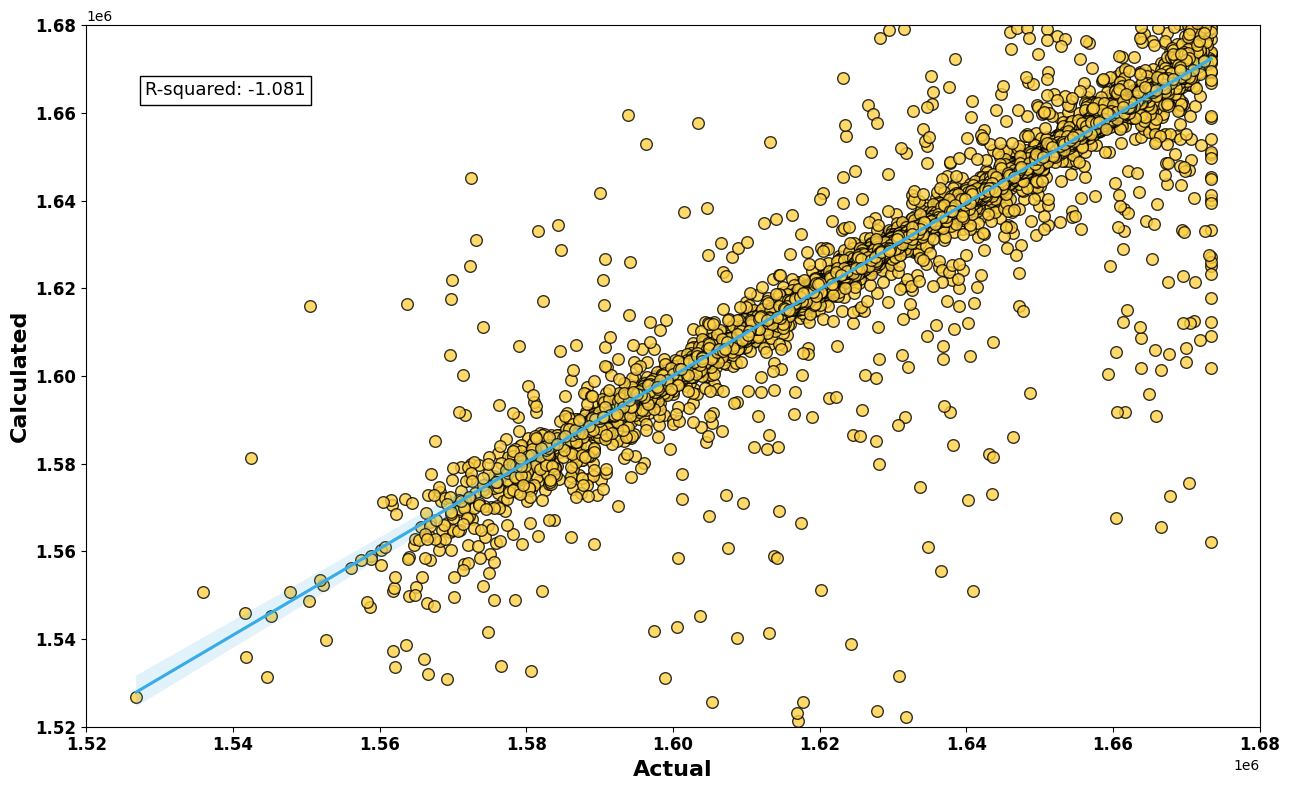

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample1000.png', dpi=600)
plt.show()

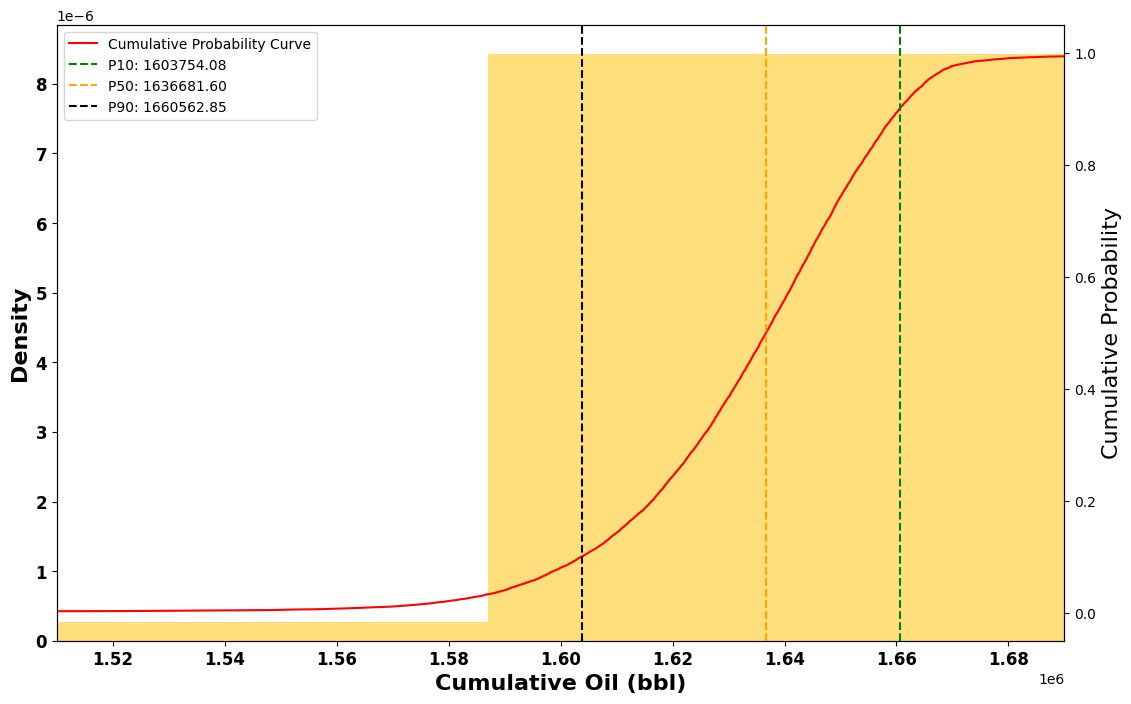

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.51e6
x_max = 1.69e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data2['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data2['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data2['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data2['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data2['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Sample1000.png', dpi=600)
plt.show()

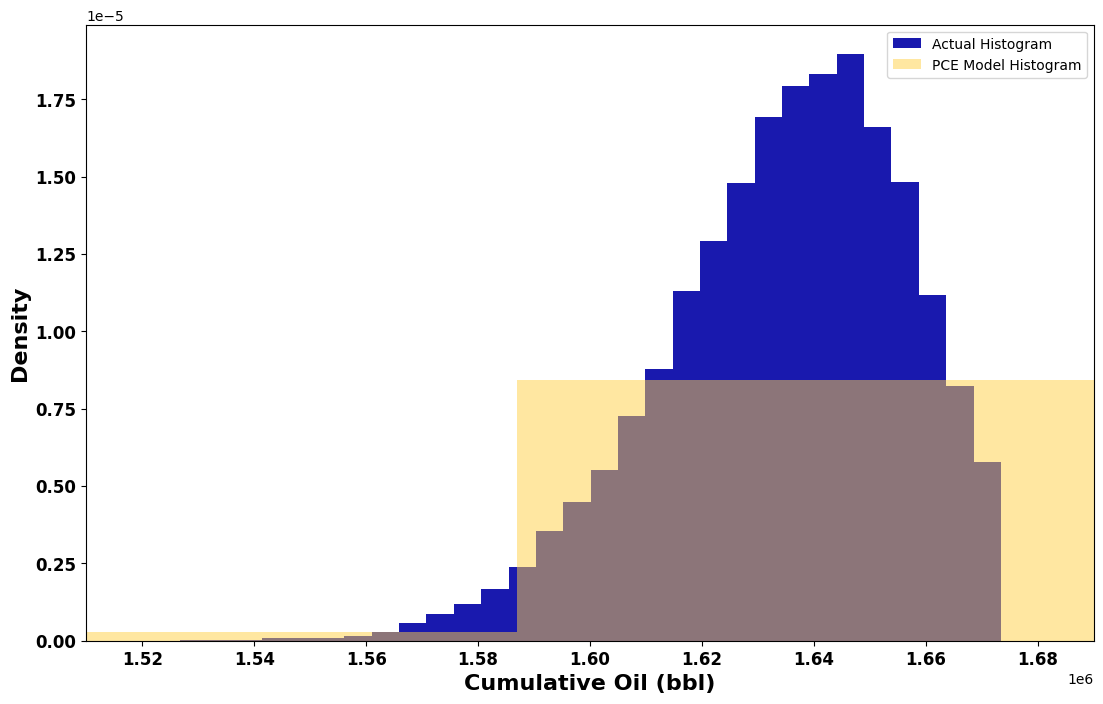

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.51e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data2['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data2['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Sample1000.png', dpi=600)
plt.show()

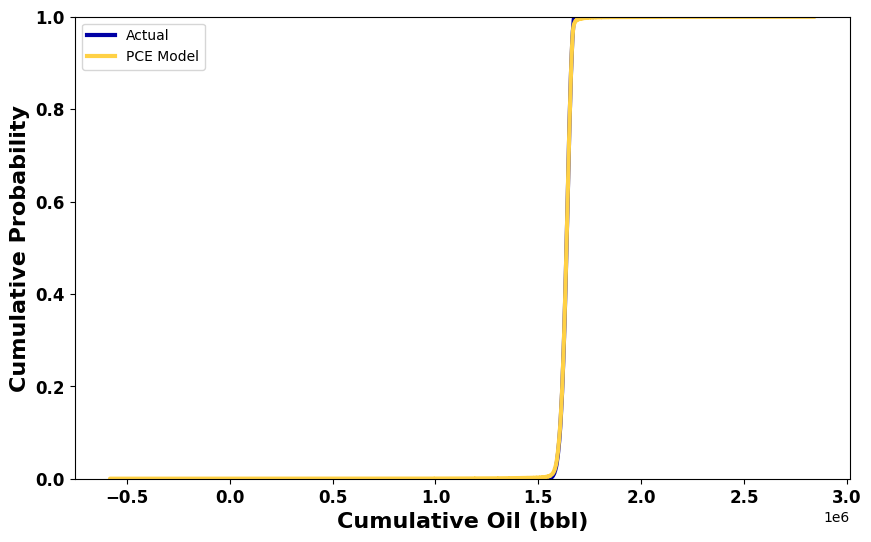

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Create the cumulative distribution plot
plt.figure(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data2, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data2, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree1000.png', dpi=600)
plt.show()

________

#**DEGREE 7**

In [52]:
first_1000_3 = df2.head(1500)
X = first_1000_3.drop(columns="Cum_Oil").to_numpy()
y = first_1000_3.Cum_Oil.to_numpy()

In [53]:
X.shape

(1500, 3)

In [54]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)


In [55]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [56]:
moments=pce.get_moments()
moments

(1627160.9954548366, 2050790924807.5784)

In [57]:
Test_Data3 = df2.copy()
X_test = Test_Data3.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [58]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data3['Cum_Oil_PCE'] = y_test

Test_Data3.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641586e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657852e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637293e+06
3,0.000003,1.085006,0.985052,1637746.9,1.638301e+06
4,0.000005,0.893916,1.116380,1642039.0,1.642237e+06


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data3)

# Predict on training and test sets
y_test = Test_Data3['Cum_Oil']
y_test_PCE = Test_Data3['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0009256129669781801


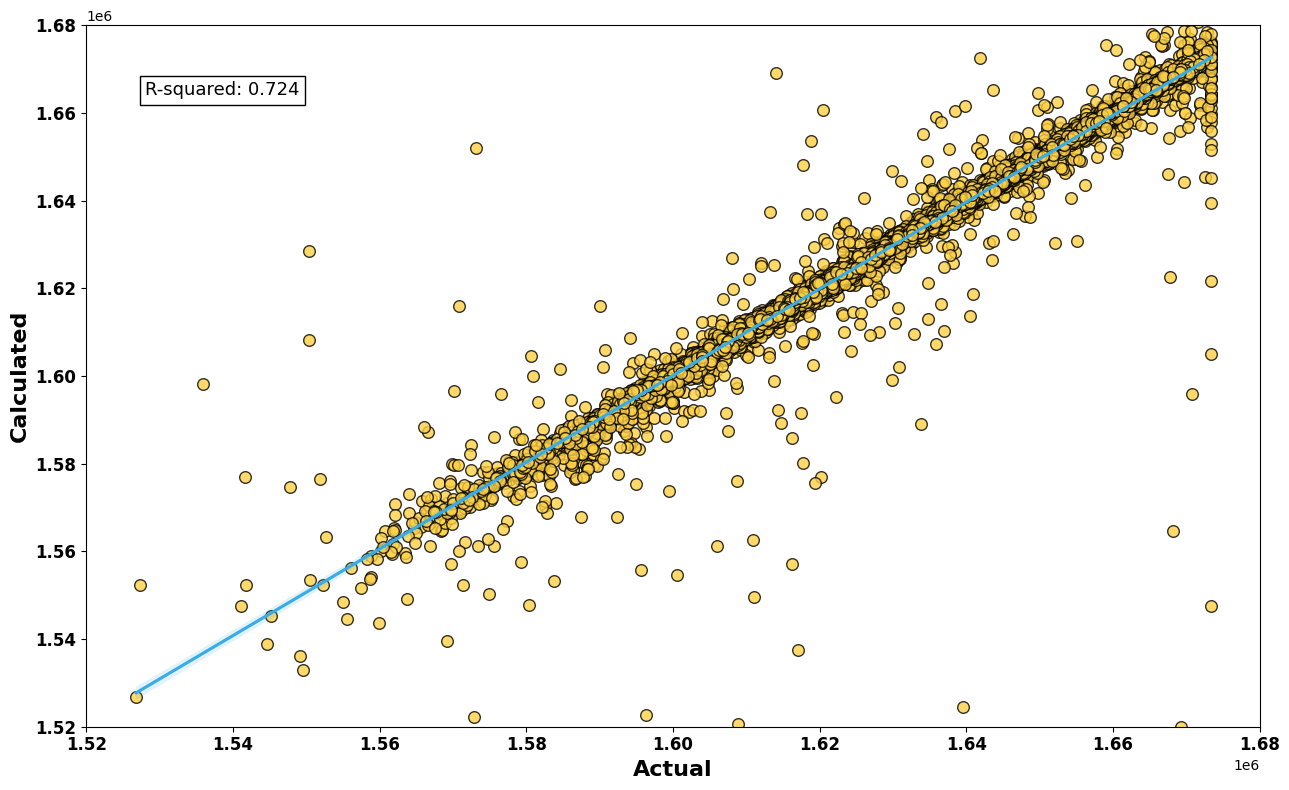

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data3['Cum_Oil']
y_test_PCE = Test_Data3['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample1500.png', dpi=600)
plt.show()

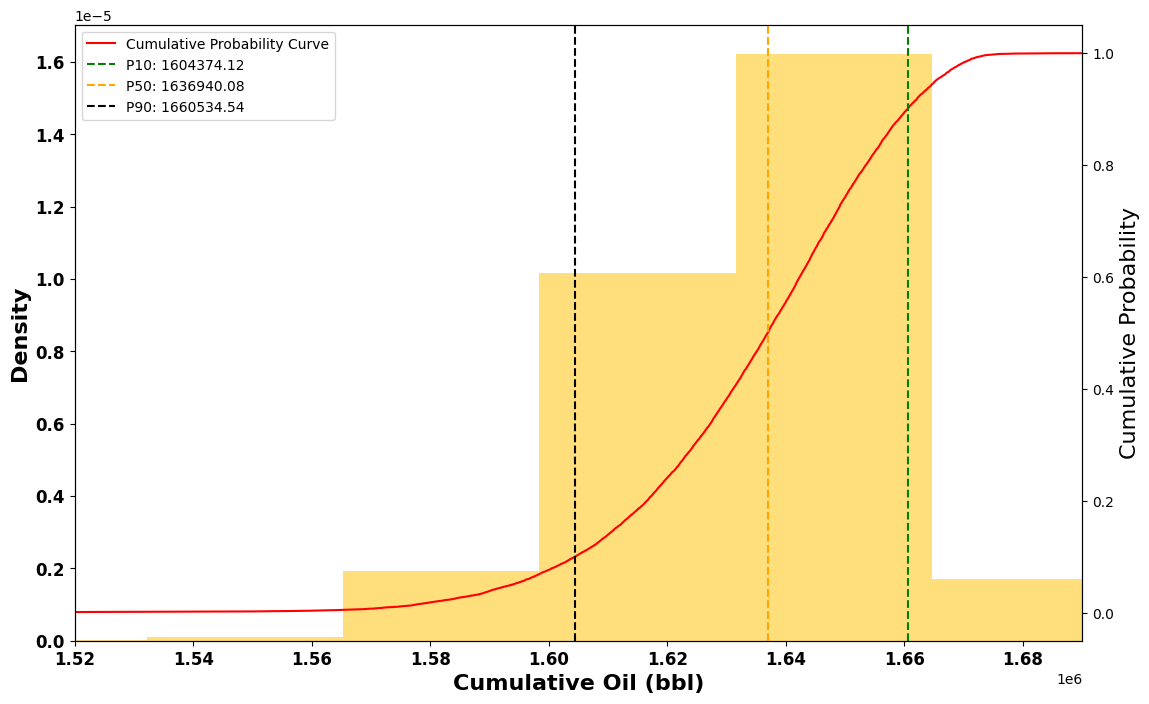

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data3['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data3['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data3['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data3['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data3['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_PCE_Sample1500.png', dpi=600)
plt.show()

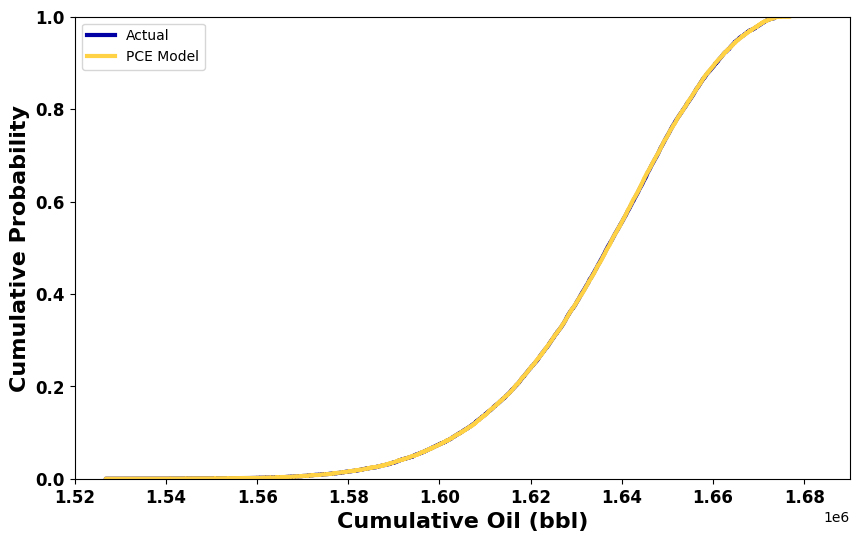

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data3, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data3, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Sample1500.png', dpi=600)
plt.show()

#**DEGREE 9**

In [69]:
first_1000_4 = df2.head(2500)
X = first_1000_4.drop(columns="Cum_Oil").to_numpy()
y = first_1000_4.Cum_Oil.to_numpy()

In [70]:
X.shape

(2500, 3)

In [71]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [72]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [73]:
moments=pce.get_moments()
moments

(1630793.7139995343, 1258156420460.7383)

In [74]:
Test_Data4 = df2.copy()
X_test = Test_Data4.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [75]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data4['Cum_Oil_PCE'] = y_test

Test_Data4.tail()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
17072,0.000005,1.002530,0.997680,1643914.0,1.642316e+06
17073,0.000004,1.020072,1.156218,1661441.1,1.661491e+06
17074,0.000004,0.787814,0.982429,1584137.9,1.584250e+06
17075,0.000005,0.881290,1.062378,1632599.6,1.632174e+06
17076,0.000005,1.074085,1.158148,1668201.6,1.668277e+06


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data4)

# Predict on training and test sets
y_test = Test_Data4['Cum_Oil']
y_test_PCE = Test_Data4['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0005785474198403205


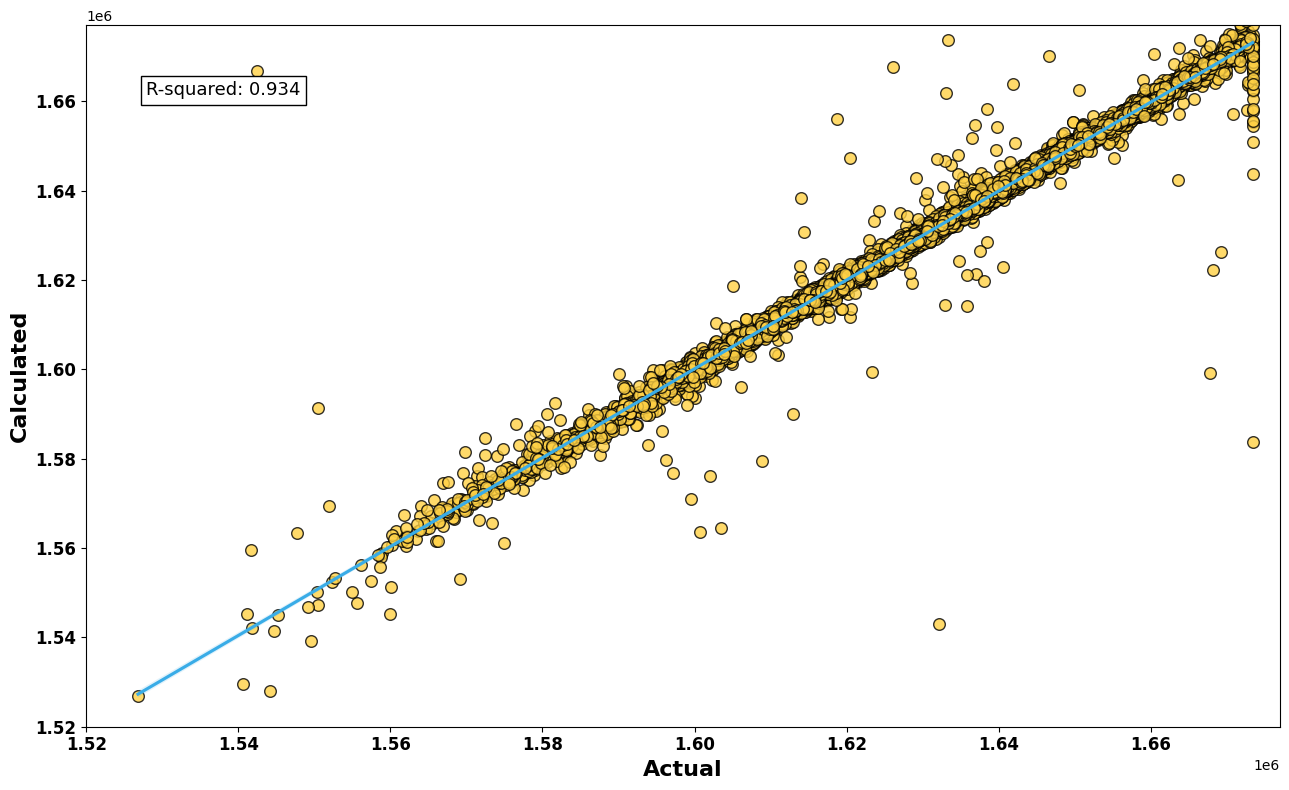

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data4['Cum_Oil']
y_test_PCE = Test_Data4['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample2500.png', dpi=600)
plt.show()

_________

#**Sample 3500**

In [88]:
first_1000_5 = df2.head(3500)
X = first_1000_5.drop(columns="Cum_Oil").to_numpy()
y = first_1000_5.Cum_Oil.to_numpy()

In [89]:
X.shape

(3500, 3)

In [91]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [92]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [93]:
moments=pce.get_moments()
moments

(1633369.5561895925, 798820894902.3585)

In [94]:
Test_Data5 = df2.copy()
X_test = Test_Data5.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [95]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data5['Cum_Oil_PCE'] = y_test

Test_Data5.head()

,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641550e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657825e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637284e+06
3,0.000003,1.085006,0.985052,1637746.9,1.638128e+06
4,0.000005,0.893916,1.116380,1642039.0,1.642076e+06


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data5)

# Predict on training and test sets
y_test = Test_Data5['Cum_Oil']
y_test_PCE = Test_Data5['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0004666298353829369


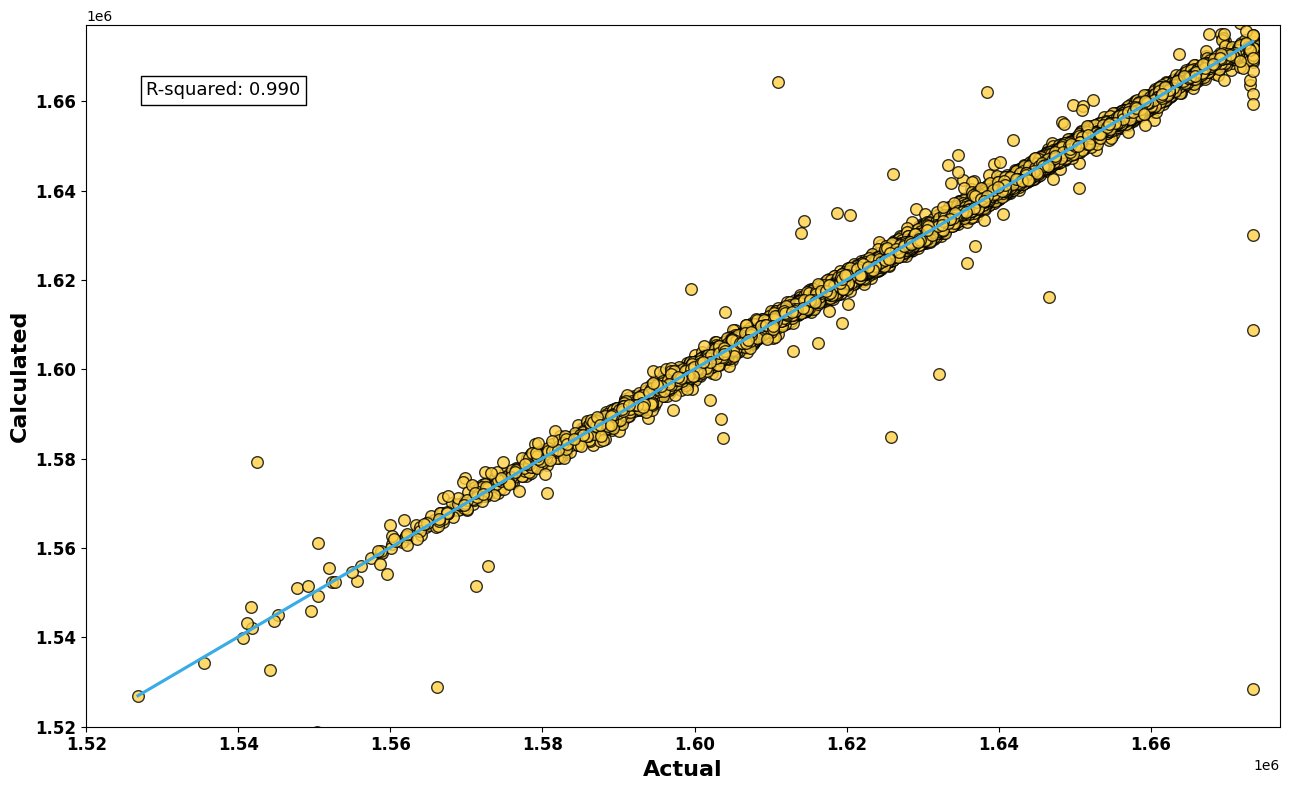

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data5['Cum_Oil']
y_test_PCE = Test_Data5['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample3000.png', dpi=600)
plt.show()

#**DEGREE 11**

In [99]:
first_1000_5 = df2.head(5000)
X = first_1000_5.drop(columns="Cum_Oil").to_numpy()
y = first_1000_5.Cum_Oil.to_numpy()

In [100]:
X.shape

(5000, 3)

In [101]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [102]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [103]:
moments=pce.get_moments()
moments

(1631990.1392988325, 349499661177.35364)

In [104]:
Test_Data6 = df2.copy()
X_test = Test_Data6.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [105]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data6['Cum_Oil_PCE'] = y_test

Test_Data6.head()


,CCPOR,PERMI_MULTI,POR_MULTI,Cum_Oil,Cum_Oil_PCE
0,0.000005,1.001000,1.001000,1641502.0,1.641576e+06
1,0.000004,1.047771,1.100369,1658139.5,1.657753e+06
2,0.000004,1.021748,0.986743,1638181.8,1.637270e+06
3,0.000003,1.085006,0.985052,1637746.9,1.638007e+06
4,0.000005,0.893916,1.116380,1642039.0,1.641903e+06


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data6)

# Predict on training and test sets
y_test = Test_Data6['Cum_Oil']
y_test_PCE = Test_Data6['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.00041784682067213364


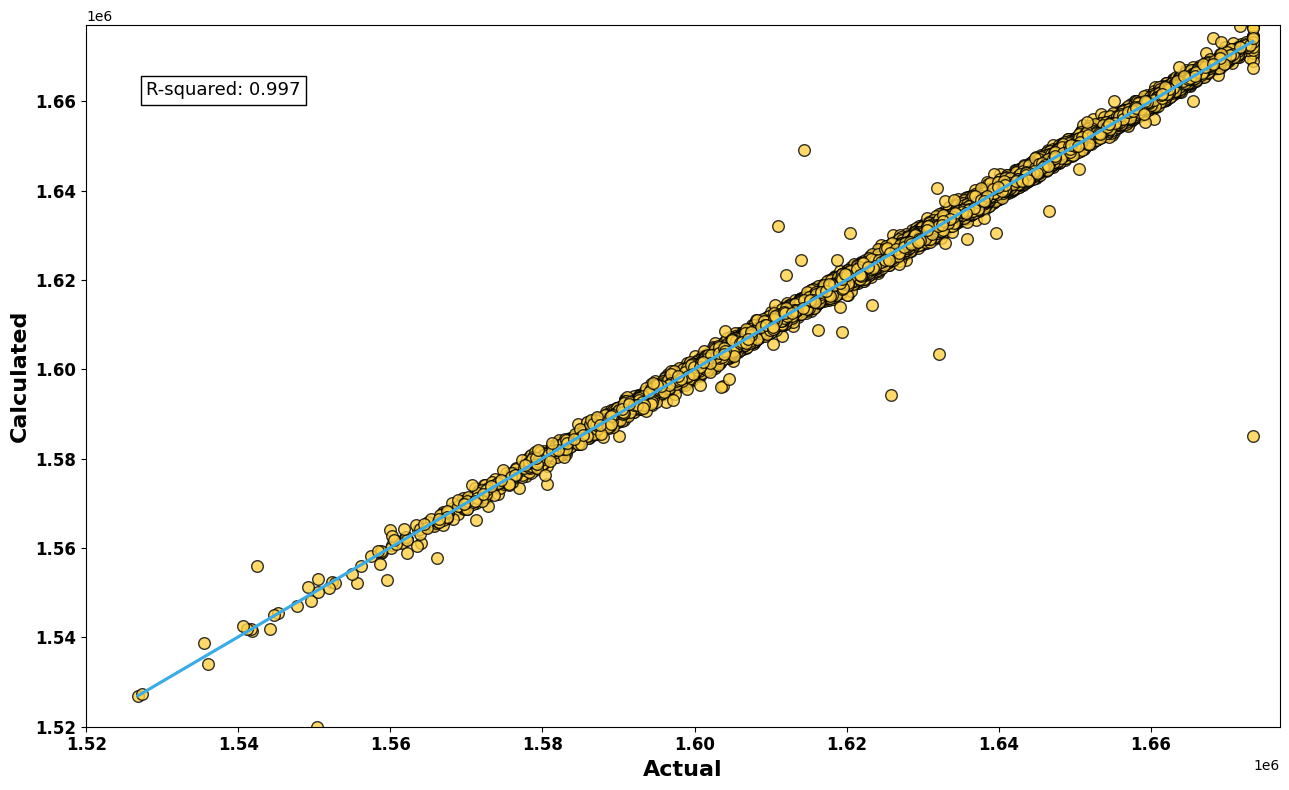

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data6['Cum_Oil']
y_test_PCE = Test_Data6['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample5000.png', dpi=600)
plt.show()

______

_________

#**Combine Plot**

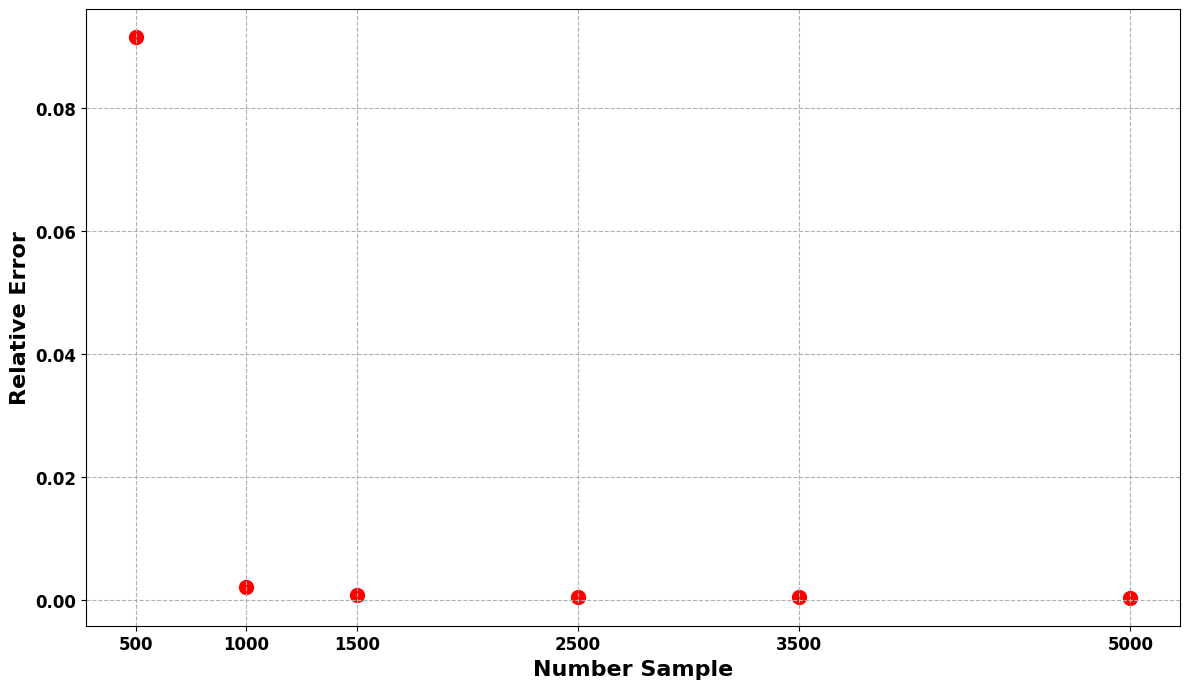

In [109]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [500, 1000, 1500, 2500, 3500, 5000]
relative_errors = [0.09145112, 0.00217431, 0.00092561, 0.00057854, 0.00046662, 0.00041784]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, relative_errors, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('Number Sample', fontweight='bold', fontsize=16)
plt.ylabel('Relative Error', fontweight='bold', fontsize=16)
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, which="both", ls="--")

# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/Relative_Error_Plot_SampleTune.png', dpi=300)
plt.show()


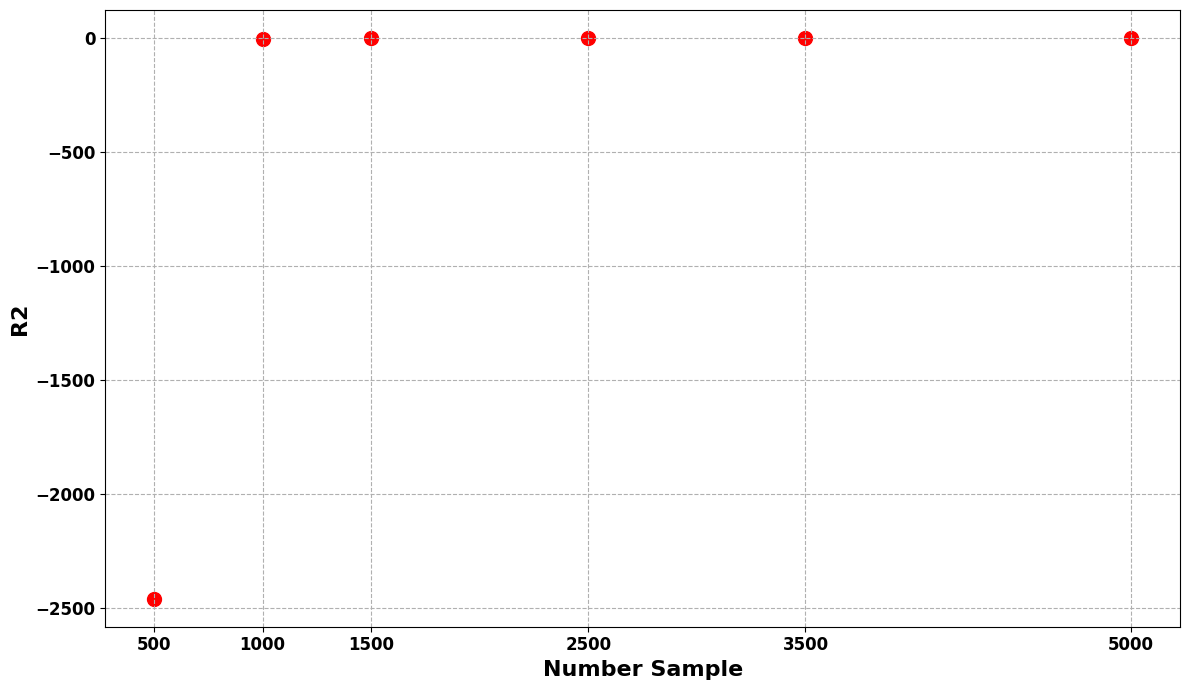

In [110]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [500, 1000, 1500, 2500, 3500, 5000]
r2_values = [-2457.617, -1.08065, 0.724, 0.934, 0.990, 0.997]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, r2_values, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('Number Sample', fontweight='bold', fontsize=16)
plt.ylabel('R2', fontweight='bold', fontsize=16)
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, which="both", ls="--")

# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/R2_Plot_Sample.png', dpi=300)
plt.show()


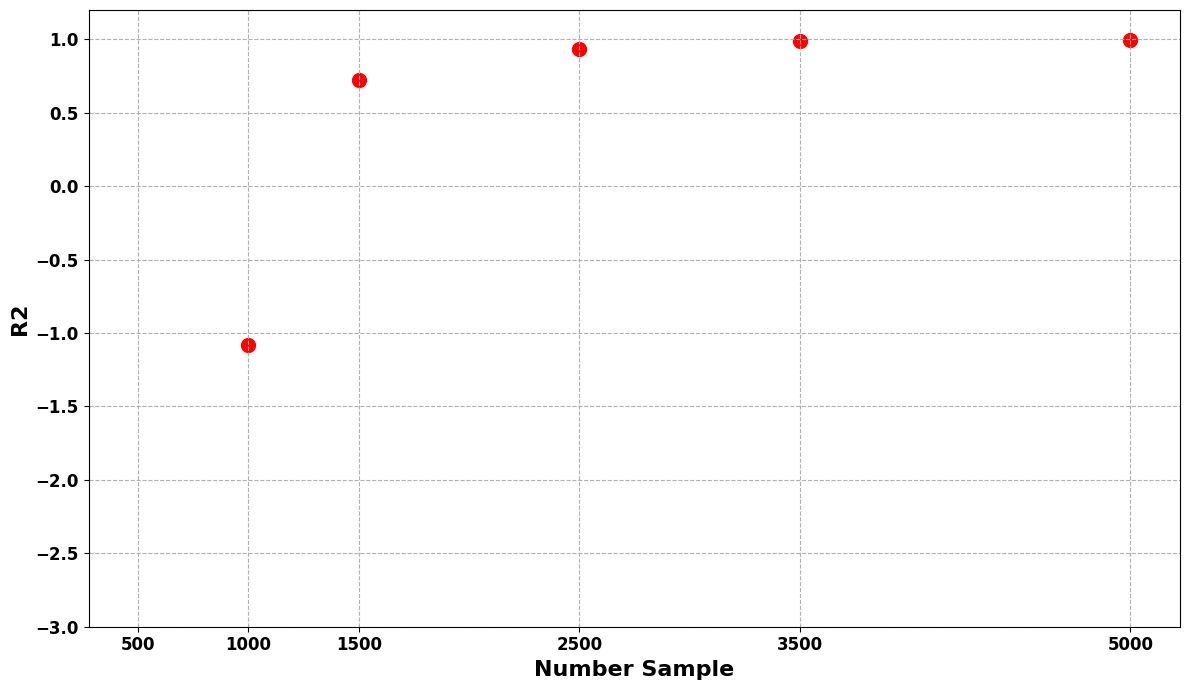

In [111]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [500, 1000, 1500, 2500, 3500, 5000]
r2_values = [-2457.617, -1.08065, 0.724, 0.934, 0.990, 0.997]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, r2_values, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('Number Sample', fontweight='bold', fontsize=16)
plt.ylabel('R2', fontweight='bold', fontsize=16)
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')

# Adjust y-axis limits to enhance visibility
plt.ylim(-3, 1.2)  # Adjust the range based on the data

plt.grid(True, which="both", ls="--")

# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/R2_Plot_Adjusted.png', dpi=300)
plt.show()
